#### Task (20 Points)

In [132]:
""" 
    topic: gaussian algorithm

    a) 
    implement the gauss algorithm as discussed in the lecture

    b)
    optimize it

    c) 
    compare the runtime of both a) and b)
"""
import numpy as np
from scipy.linalg import toeplitz
import timeit
import matplotlib.pyplot as plt
class Vector:
    def __init__(self, elements: list[int| float]):
        self.vector = np.array(elements,dtype=np.float64)

    def __getitem__(self, ind):
        return self.vector[ind]

    def __setitem__(self, ind, value):
        self.vector[ind] = value

    def __str__(self):
        return f"Vector(\n{self.vector}\n)"

    def __len__(self):
        return len(self.vector)

    def transpose(self):
        return Vector(self.vector.reshape(-1, 1))

class Matrix:
    def __init__(self, rows: list[list[int|float]]):
        self.rows = np.array(rows,dtype=np.float64)
        self.shape = self.rows.shape
        if not self.is_quadratic():
            raise ValueError(f"Non-Quadratic Matrix: {self.shape}")

    def __getitem__(self, ind):
        row,col = ind 
        return self.rows[row, col]

    def __setitem__(self, ind, value):
        row,col = ind
        self.rows[row, col] = value

    def __str__(self):
        matrix_str = "\n".join(" ".join("{:<5}".format(str(elem)) for elem in row) for row in self.rows)
        return f"Matrix(\n{matrix_str}\n)"

    def __len__(self):
        return self.shape[1]

    def is_quadratic(self):
        return self.shape[0] == self.shape[1]
    
class Gauss:
    def __init__(self,A:list,b:list):
        self.A = Matrix(A)
        self.b = Vector(b)
        if not len(self.A) == len(self.b):
            raise ValueError("INVALID --- Wrong Dimensions --- INVALID")
        else:
            self.dim = len(self.b)
        self.x = np.zeros(self.dim,dtype=np.float64)

    def normal_algorithm(self):
        for k in np.arange(self.dim - 1):
            for j in np.arange(k + 1, self.dim):
                l_jk = self.A[j, k] / self.A[k, k]
                self.b[j] -= l_jk * self.b[k]
                for i in np.arange(k + 1, self.dim):
                    self.A[j, i] -= l_jk * self.A[k, i]

        for i in np.arange(self.dim - 1, -1, -1):
            total = 0
            for k in np.arange(i + 1, self.dim):
                total += self.A[i, k] * self.x[k]
            self.x[i] = (self.b[i] - total) / self.A[i, i]

        return Vector(self.x)
    
    def optimized(self):
        for k in np.arange(self.dim - 1):
            j_range = np.arange(k + 1, self.dim)
            l_jk = self.A[j_range, k] / self.A[k, k]
            self.b[j_range] -= l_jk * self.b[k]
            self.A[j_range, k+1:] -= np.outer(l_jk, self.A[k, k+1:])

        for i in np.arange(self.dim - 1, -1, -1):
            k_range = np.arange(i + 1, self.dim)
            total = np.sum(self.A[i, k_range] * self.x[k_range])
            self.x[i] = (self.b[i] - total) / self.A[i, i]

        return Vector(self.x)
    
    def runtime(self,MAX):
        RANGE = np.arange(1,MAX+1)
        y_normal = list()
        y_opt = list()
        for max in RANGE:
            n = Vector(np.arange(max,-1,-1)).transpose()
            b = Vector(np.ones(max+1))
            t = toeplitz(n)

            y1 = timeit.timeit(lambda: Gauss(t,b).normal_algorithm(),number=1)
            y_normal.append(y1)

            y2 = timeit.timeit(lambda: Gauss(t,b).optimized(),number=1)
            y_opt.append(y2)
        plt.loglog(RANGE, y_normal, label='Naive Algorithm')
        plt.loglog(RANGE, y_opt, label='Optimized Algorithm')

        plt.xlabel('Input Size (n)')
        plt.ylabel('Execution Time (seconds)')
        plt.legend()
        plt.show()

In [133]:
A = [[3,-1,5,-2],[-3,4,-1,7],[-12,10,-11,16],[3,5,17,2]]
b = [13,3,-20,47]
g = Gauss(A,b)

In [84]:
print(g.normal_algorithm().transpose())

Vector(
[[2.]
 [1.]
 [2.]
 [1.]]
)


In [95]:
print(g.optimized().transpose())

Vector(
[[2.]
 [1.]
 [2.]
 [1.]]
)


In [25]:
print(g.A)

Matrix(
3     -1    5     -2   
-3    3     4     5    
-12   6     1     -2   
3     6     4     2    
)


In [26]:
print(g.b.transpose())

Vector(
[[13]
 [16]
 [ 0]
 [ 2]]
)


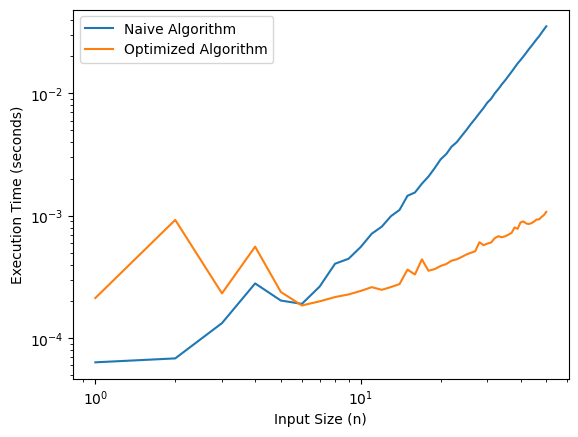

In [140]:
g.runtime(50)